## Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = 1.999834548454241
y = 2.999751822681365
z = -4.999999991031778


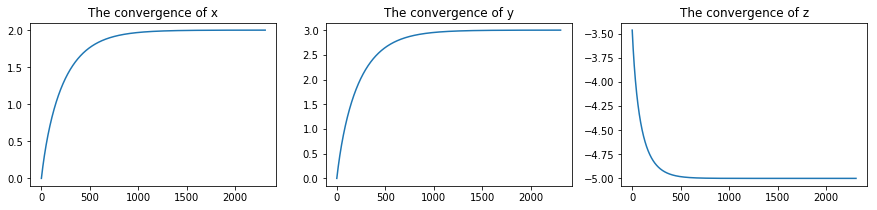

In [2]:
# The gradient of z wrt x
def dz_dx(x,y):
    return(2*(x-2)/np.sqrt(25-(x-2)**2-(y-3)**2))

# The gradient of z wrt y
def dz_dy(x,y):
    return(2*(y-3)/np.sqrt(25-(x-2)**2-(y-3)**2))

# The value of z
def z(x,y):
    return(-np.sqrt(25-(x-2)**2-(y-3)**2))

x_old,y_old = -float('inf'),-float('inf')
x_new,y_new = 0,0
learning_rate = 0.01
epsilon = 0.000001
x_list,y_list,z_list = [],[],[]

while x_new-x_old > epsilon or y_new-y_old > epsilon:
    x_old = x_new
    y_old = y_new
    
    z_new = z(x_new,y_new)
    
    x_list.append(x_new)
    y_list.append(y_new)
    z_list.append(z_new)
    
    # Calculate the gradient of z wrt x and y at (x_new,y_new)
    dx = dz_dx(x_new,y_new)
    dy = dz_dy(x_new,y_new)
    
    # Update (x_new,y_new)
    x_new = x_new - learning_rate*dx
    y_new = y_new - learning_rate*dy

print('x =',x_new)
print('y =',y_new)
print('z =',z_new)

plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.plot(range(len(x_list)), x_list)
plt.title('The convergence of x')

plt.subplot(1,3,2)
plt.plot(range(len(y_list)), y_list)
plt.title('The convergence of y')

plt.subplot(1,3,3)
plt.plot(range(len(z_list)), z_list)
plt.title('The convergence of z')
plt.show()

## Problem 2

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

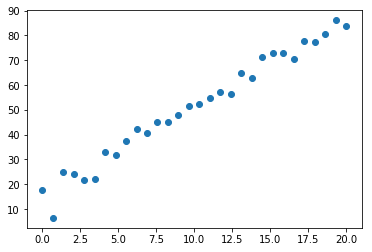

In [4]:
n_samples = 30
train_x = np.linspace(0,20,n_samples)
train_y = 3.7*train_x + 14 + 4*np.random.randn(n_samples)

train_x = train_x.reshape(-1,1)
train_y = train_y.reshape(-1,1)

plt.figure(0)
plt.plot(train_x, train_y,'o')
plt.show()

### Scikit-Learn

In [5]:
from sklearn import linear_model

linreg = linear_model.LinearRegression()
linreg.fit(train_x,train_y)

print('The slope is',linreg.coef_)
print('The intercept is',linreg.intercept_)

The slope is [[3.5856062]]
The intercept is [15.26728829]


### Gradient Descent

The slope is [3.58565324]
The intercept is [15.26665145]


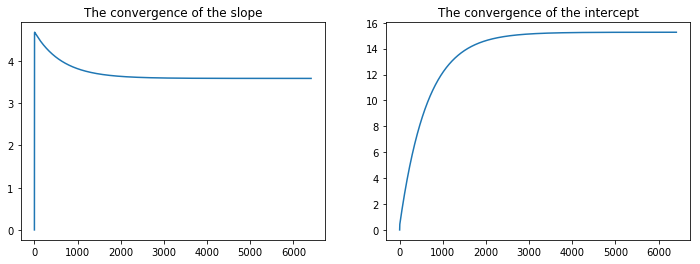

In [6]:
# The gradient of residues sum of squares (RSS) wrt the slope m
def dRSS_dm(m,b):
    return(-2*sum((train_y-m*train_x-b)*train_x))

# The gradient of residues sum of squares (RSS) wrt the intercept b
def dRSS_db(m,b):
    return(-2*sum((train_y-m*train_x-b)))

m_old,b_old = -float('inf'),-float('inf')
m_new,b_new = 0,0
learning_rate = 0.0001
epsilon = 0.000001
m_list,b_list = [],[]

while m_new-m_old > epsilon or b_new-b_old > epsilon:
    m_old = m_new
    b_old = b_new
    
    m_list.append(m_new)
    b_list.append(b_new)
    
    # Calculate the gradient of RSS wrt m and b at (m_new,b_new)
    dm = dRSS_dm(m_new,b_new)
    db = dRSS_db(m_new,b_new)
    
    # Update (m_new,b_new)
    m_new = m_new - learning_rate*dm
    b_new = b_new - learning_rate*db

print('The slope is',m_new)
print('The intercept is',b_new)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(len(m_list)), m_list)
plt.title('The convergence of the slope')

plt.subplot(1,2,2)
plt.plot(range(len(b_list)), b_list)
plt.title('The convergence of the intercept')
plt.show()